## LABORATORY 03: MACHINE LEARNING I - REGRESSION PROBLEM

### Case of Study 1: Predicting Melbourne Housing Prices

#### 1. Load the dataset

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# load dataset
dataset = pd.read_csv('dataset/disney_movies.csv', sep = ';')
metadata = dataset.columns
dataset.head(5)

,movie_title,release_date,genre,mpaa_rating,total_gross,"inflation_adjusted_gross,,"
0,Snow White and the Seven Dwarfs,21.12.1937,Musical,G,184925485,"5228953251,,"
1,Pinocchio,09.02.1940,Adventure,G,84300000,"2188229052,,"
2,Fantasia,13.11.1940,Musical,G,83320000,"2187090808,,"
3,Song of the South,12.11.1946,Adventure,G,65000000,"1078510579,,"
4,Cinderella,15.02.1950,Drama,G,85000000,"920608730,,"


In [3]:
# dimensions of dataset
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  579
#features =  6


In [4]:
# manage metadata
def get_metadata(data):
    metadata = data.columns
    numerical_cols = data.select_dtypes(include = ["float64", "int64"]).columns.tolist()
    categorical_cols = data.select_dtypes(include = ["object"]).columns.tolist()
    print("Numerical features: ", numerical_cols)
    print("Categorical features: ", categorical_cols)
    return metadata, numerical_cols, categorical_cols

In [5]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)

Numerical features:  ['total_gross']
Categorical features:  ['movie_title', 'release_date', 'genre', 'mpaa_rating', 'inflation_adjusted_gross,,']


#### 2. Exploratory Data Analysis (EDA)

Filtering missing values

In [6]:
# function to filter missing data
def filter_missing(data):
    sbn.displot(
        data = data.isna().melt(value_name="missing"),
        y = "variable",
        hue = "missing",
        multiple = "fill",
        aspect = 1.5
    )

    plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


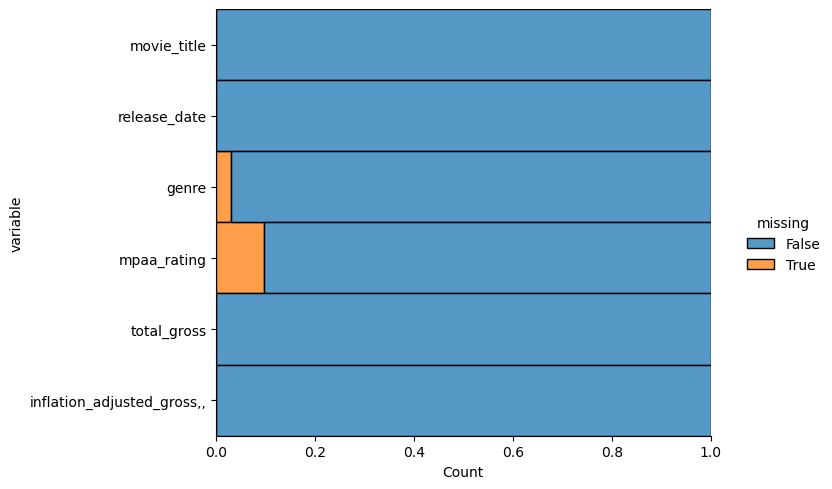

In [7]:
# original state of missing values
filter_missing(dataset)

Numerical Features

In [8]:
# function to plot histogram of frequencies
def hist_frequencies(data, numeric_cols, bins):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numeric_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()

    for i, col in enumerate(numeric_cols):
        sbn.histplot(data[col], color = "blue", bins = bins, ax = axs[i])
        axs[i].set_title("Histogram of frequencies for " + col)
        plt.xlabel(col)
        plt.ylabel("Frequencies")
    plt.tight_layout()
    plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


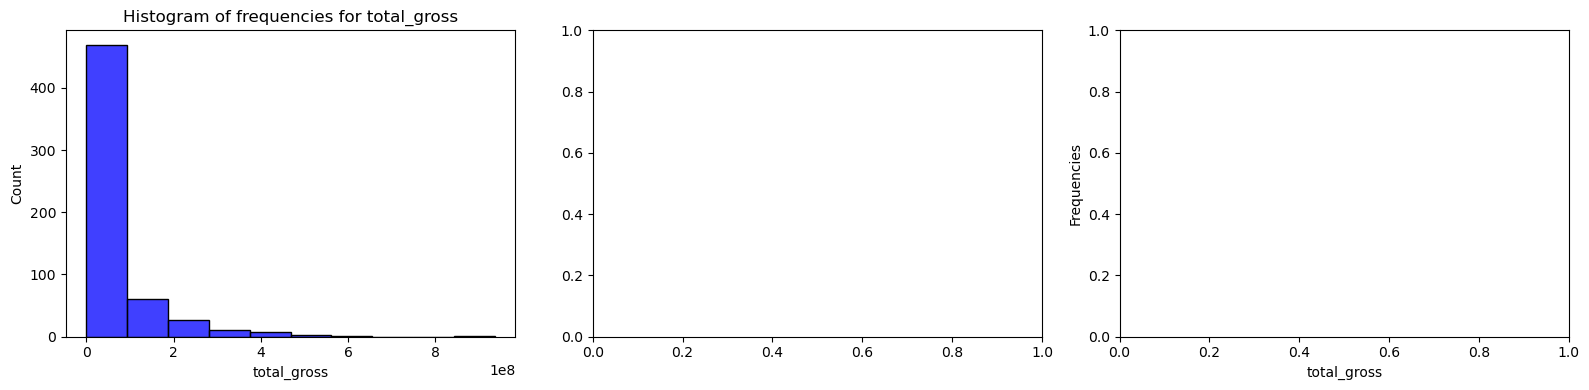

In [9]:
hist_frequencies(dataset, numeric_cols, bins = 10)

In [10]:
# statistical metrics
display(dataset[numeric_cols].describe())

,total_gross
count,5.790000e+02
mean,6.470179e+07
std,9.301301e+07
min,0.000000e+00
25%,1.278886e+07
50%,3.070245e+07
75%,7.570903e+07
max,9.366622e+08


Categorical Features

In [11]:
# cycle to calculate number of instances in each categorical column
for col in categ_cols:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** movie_title ******
movie_title
The Jungle Book                 3
Freaky Friday                   2
Cinderella                      2
Bad Company                     2
101 Dalmatians                  2
                               ..
Quiz Show                       1
A Simple Twist of Fate          1
It's Pat                        1
Camp Nowhere                    1
Rogue One: A Star Wars Story    1
Name: count, Length: 573, dtype: int64

***** release_date ******
release_date
25.12.1997    3
25.12.1998    2
22.11.2013    2
22.11.2000    2
01.01.2002    2
             ..
02.09.1994    1
19.08.1994    1
12.08.1994    1
15.07.1994    1
16.12.2016    1
Name: count, Length: 553, dtype: int64

***** genre ******
genre
Comedy                 182
Adventure              129
Drama                  114
Action                  40
Thriller/Suspense       24
Romantic Comedy         23
Musical                 16
Documentary             16
Western                  7
Horror                   

#### 3. Data Preparation

Feature Engineer

In [12]:
# drop the columns which don't have any relevance
def feature_engineer(data):
    # extract information from Date    
    data["Date"] = pd.to_datetime(data["release_date"], errors = "coerce")
    data["SaleDayOfWeek"] = data["release_date"].dt.dayofweek
    
    # drop non-relevant columns 
    nrelev_cols = ["movie_title", "genre", "G", "Date"]
    data = data.drop(nrelev_cols, axis = 1)

    return data

In [13]:
dataset = feature_engineer(dataset)

C:\Users\Sechnik\AppData\Local\Temp\ipykernel_20428\2288951023.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data["Date"] = pd.to_datetime(data["release_date"], errors = "coerce")


AttributeError: Can only use .dt accessor with datetimelike values

In [43]:
print("#samples = ", dataset.shape[0])
print("#features = ", dataset.shape[1])

#samples =  579
#features =  7


In [15]:
metadata, numeric_cols, categ_cols = get_metadata(dataset)
print("Numerical features: ", numeric_cols)
print("Categorical features: ", categ_cols)

Numerical features:  ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'SaleDayOfWeek']
Categorical features:  ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']
Numerical features:  ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'SaleDayOfWeek']
Categorical features:  ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']


Data imputation with K-Nearest Neighbors (KNN)

In [16]:
from sklearn.impute import KNNImputer

def imputation_data(data, num_cols, categ_cols):
    # imputation for numerical columns
    knn_imputer = KNNImputer(n_neighbors = 5)
    data[num_cols] = knn_imputer.fit_transform(data[num_cols])
    # imputation for categorical columns
    for col in categ_cols:
        data[col] = data[col].fillna(data[col].mode()[0])
    
    return data

In [17]:
data = imputation_data(dataset, numeric_cols, categ_cols)
data.head()

,Suburb,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,SaleDayOfWeek
0,Abbotsford,2.0,h,743400.0,SS,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2.0
1,Abbotsford,2.0,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,5.0
2,Abbotsford,2.0,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,5.0
3,Abbotsford,3.0,u,1083000.0,VB,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,5.0
4,Abbotsford,3.0,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0


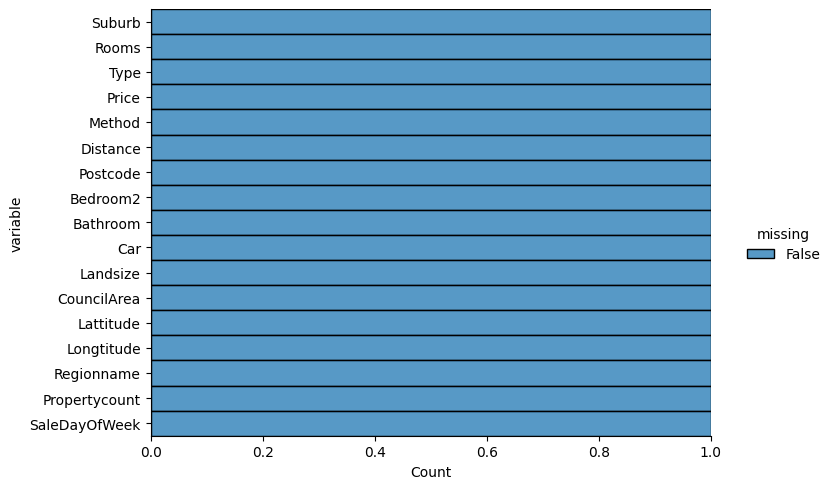

In [18]:
# state of missing values after imputation
filter_missing(dataset)

Exploration of Data after Imputation

In [19]:
# check type of relationship between variables
def gen_pairplot(data, metadata):
    sbn.set_theme(context = 'notebook', style = 'darkgrid')    
    sbn.pairplot(data[metadata], height = 2.0)
    plt.show()

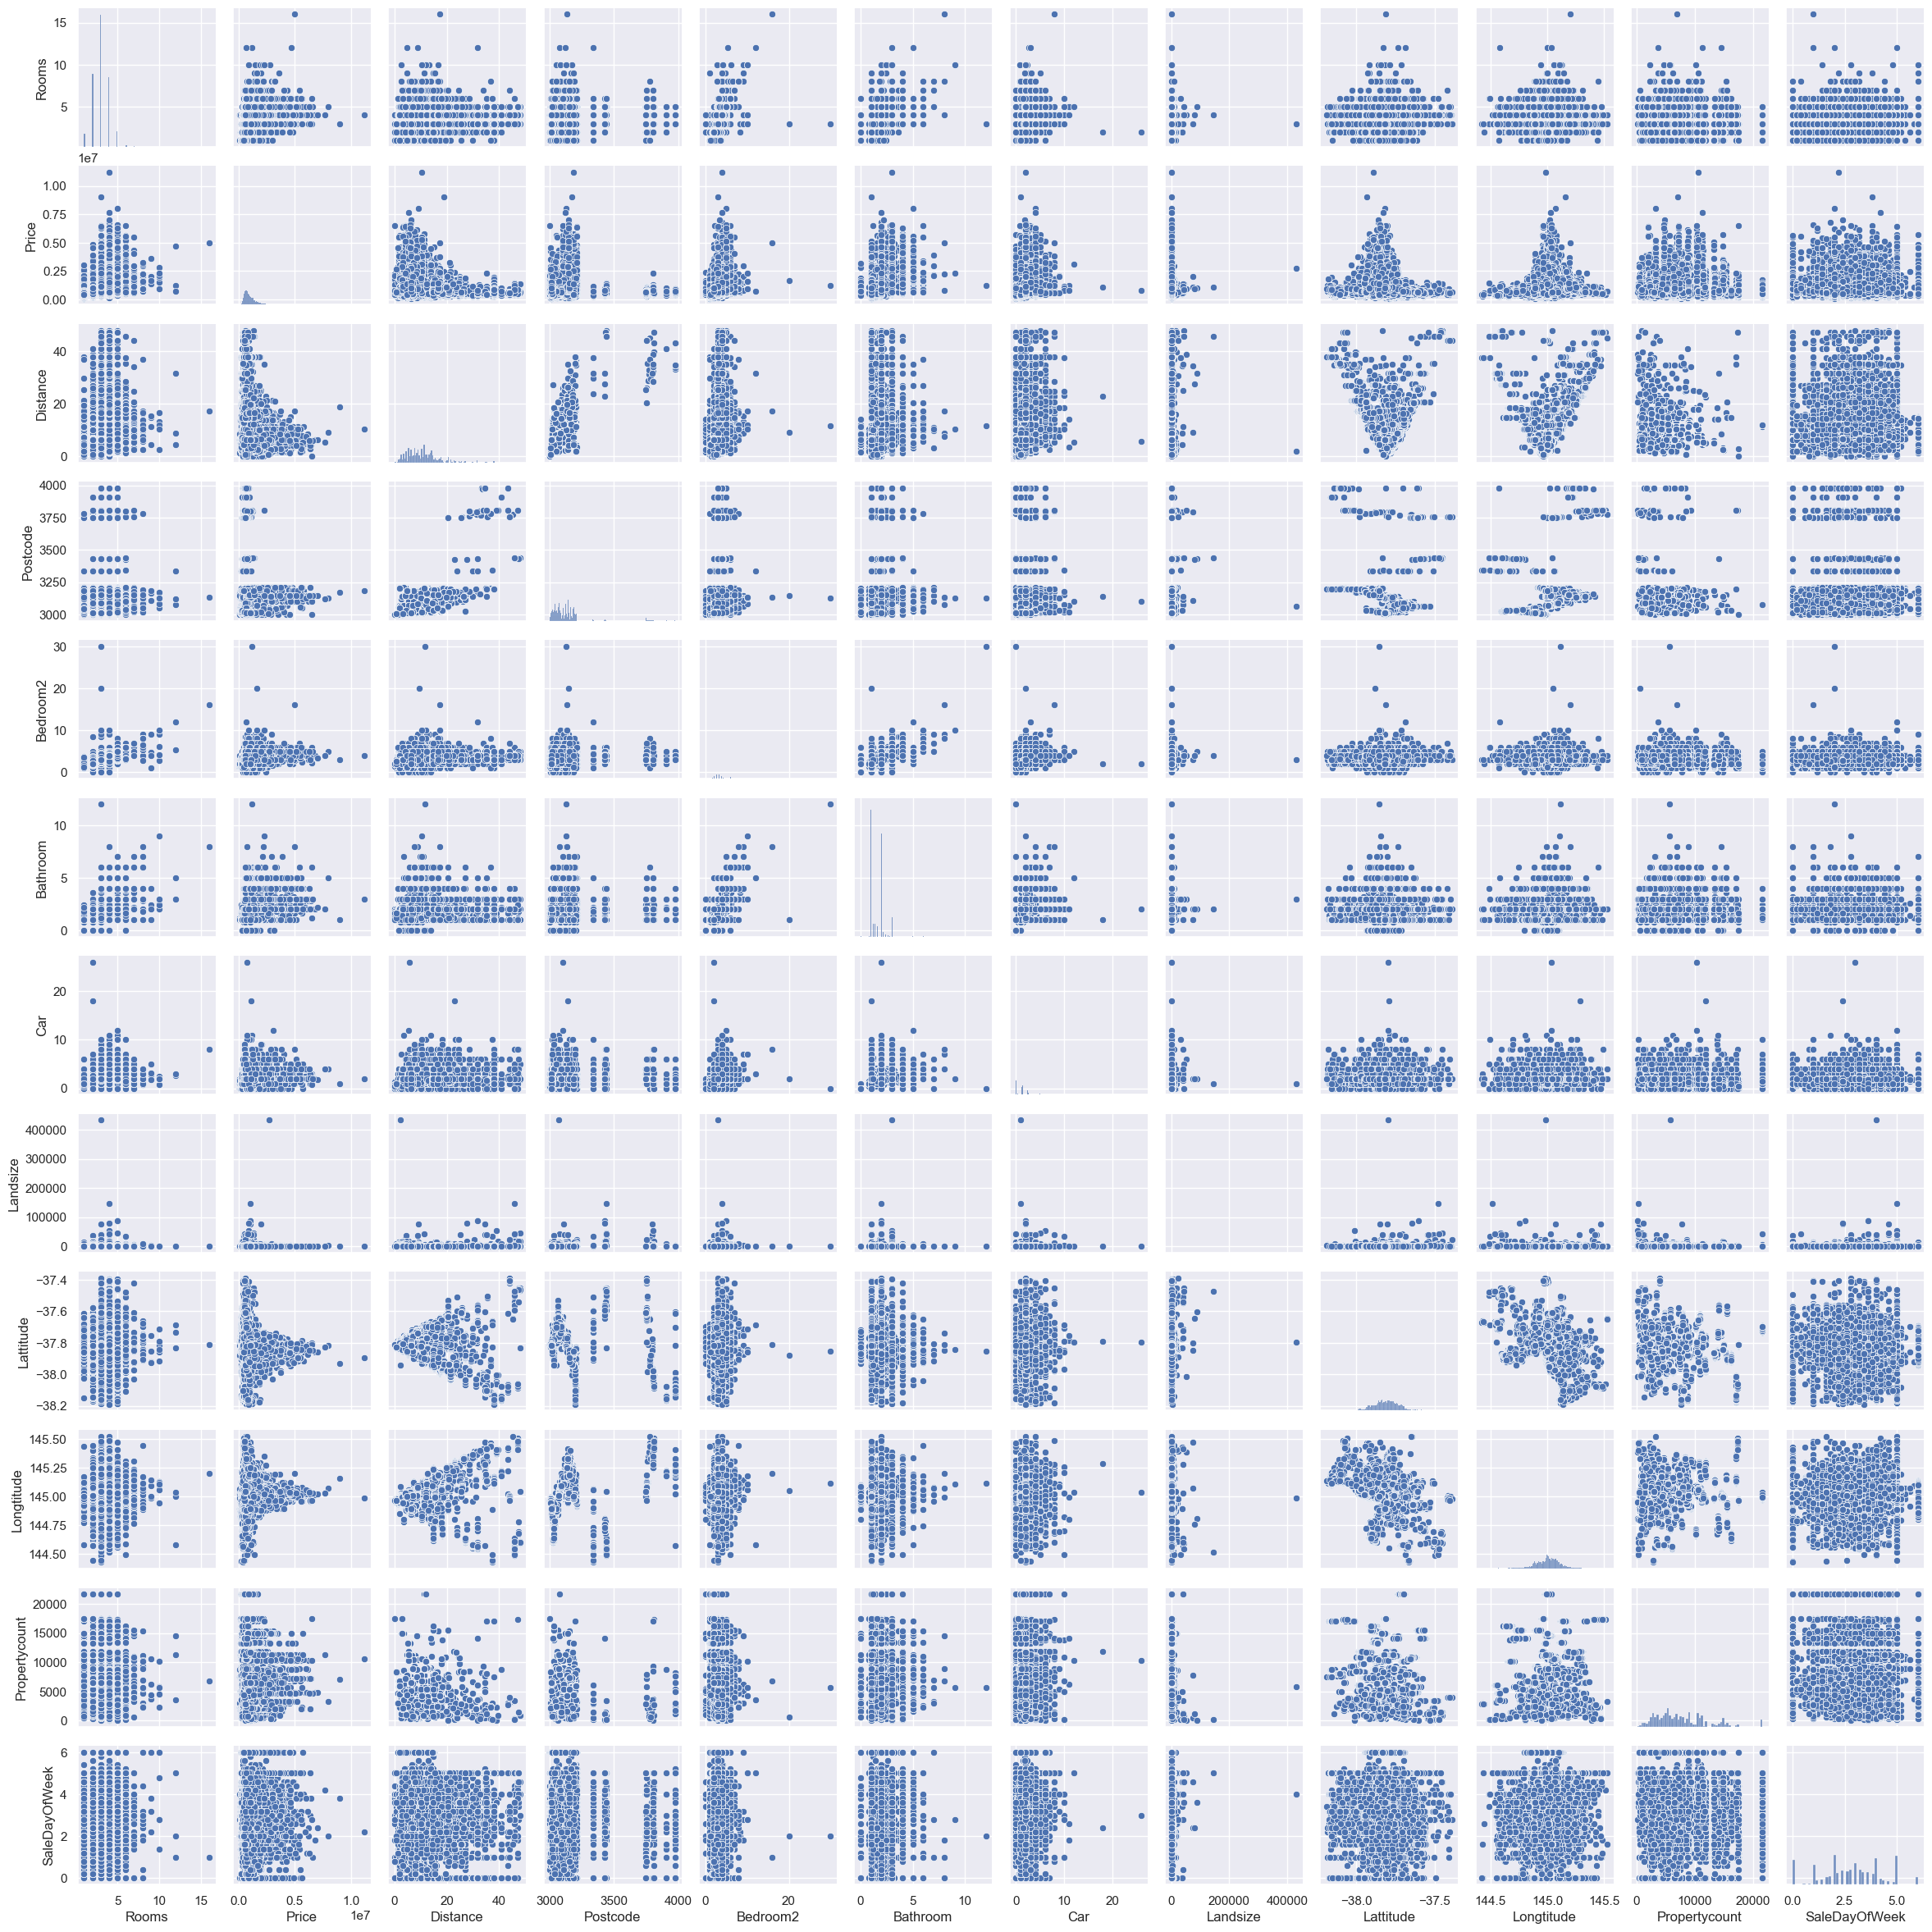

In [20]:
gen_pairplot(dataset, numeric_cols)

In [21]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

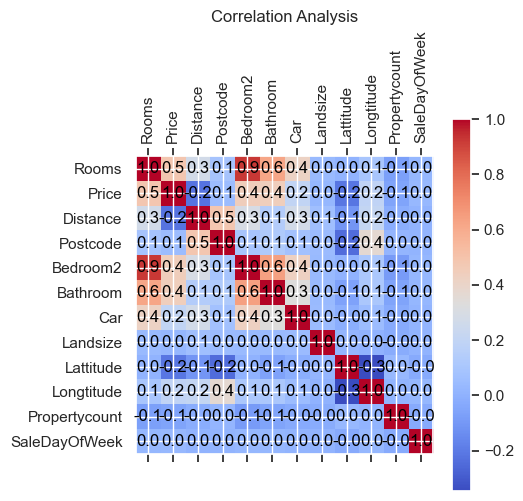

In [22]:
plot_correlation(dataset, numeric_cols)

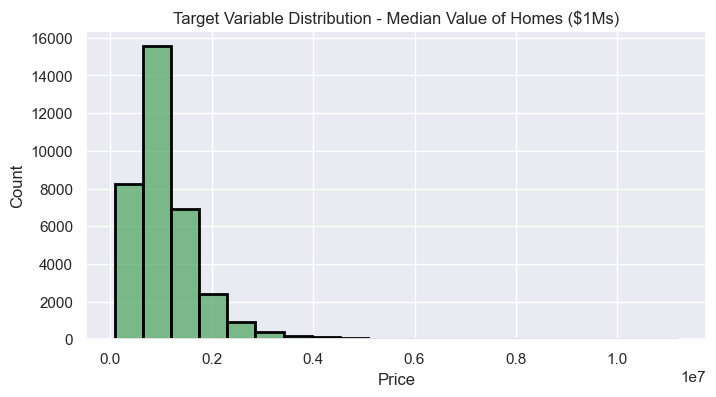

In [23]:
# probability distribution of the target variable
plt.figure(figsize=[8,4])
sbn.histplot(dataset["Price"], color='g', edgecolor="black", linewidth=2, bins=20)

plt.title("Target Variable Distribution - Median Value of Homes ($1Ms)")
plt.show()

#### 4. Data Preprocessing

In [24]:
# split independent and dependent variables
x = dataset.loc[:, dataset.columns != "Price"]
y = dataset["Price"]

In [25]:
x.head()

,Suburb,Rooms,Type,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,SaleDayOfWeek
0,Abbotsford,2.0,h,SS,2.5,3067.0,2.0,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2.0
1,Abbotsford,2.0,h,S,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,5.0
2,Abbotsford,2.0,h,S,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,5.0
3,Abbotsford,3.0,u,VB,2.5,3067.0,3.0,2.0,1.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,5.0
4,Abbotsford,3.0,h,SP,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0


In [26]:
print("Dimension of features = ", x.shape)
print("Dimension of target = ", y.shape)

Dimension of features =  (34857, 16)
Dimension of target =  (34857,)


Split train and test set

In [27]:
# split train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("X-train dim: ", x_train.shape)
print("Y-train: ", len(y_train))
print("X-test dim: ", x_test.shape)
print("Y-test: ", len(y_test))

X-train dim:  (27885, 16)
Y-train:  27885
X-test dim:  (6972, 16)
Y-test:  6972


<center> Always: split the data into training and test set, then apply preprocessing!!! <center>

Transforming the numerical and categorical data

In [28]:
# take metadata
metadata, numeric_cols, categ_cols = get_metadata(x)

Numerical features:  ['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount', 'SaleDayOfWeek']
Categorical features:  ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']


<center><b>Criteria to scale numerical features<b> </center>   

**Standard Scaler**  

$$X' = \frac{X - \mu}{\sigma}$$
  
where:  
  
* $X$ is the original feature value  
* $X'$ is the scaled feature value  
* $\mu$ is the mean of the feature values  
* $\sigma$ is the standard deviation of the feature values  
  
**Robust Scaler**  
  
$$X' = \frac{X - Q_1}{Q_3 - Q_1}$$  
  
where:  
  
* $X$ is the original feature value  
* $X'$ is the scaled feature value  
* $Q_1$ is the first quartile (25th percentile) of the feature values  
* $Q_3$ is the third quartile (75th percentile) of the feature values  
  
Note: The Robust Scaler uses the interquartile range (IQR) instead of the standard deviation to make it more robust to outliers.


In [29]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

transformer = make_column_transformer(
    (StandardScaler(), ["Distance", "Lattitude", "Longtitude", "Propertycount"]),  
    (RobustScaler(), ["Rooms", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize"]),
    (OneHotEncoder(handle_unknown="ignore"), ["SaleDayOfWeek", "Type", "Method", "Regionname"]),
    (OrdinalEncoder(
        categories = [x.Suburb.unique(), x.CouncilArea.unique()], dtype = np.int64), 
        ["Suburb", "CouncilArea"]
    )
)

In [30]:
# transformer will learn only from training data
transformer.fit(x_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['Distance', 'Lattitude', 'Longtitude',
                                  'Propertycount']),
                                ('robustscaler', RobustScaler(),
                                 ['Rooms', 'Postcode', 'Bedroom2', 'Bathroom',
                                  'Car', 'Landsize']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['SaleDayOfWeek', 'Type', 'Method',
                                  'Regionname']),
                                ('ordinalencoder',
                                 OrdinalEncoder...
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council'], dtype=object)],
                                                dtype=<class 'numpy.int64'>),
                                 ['Suburb', 'CouncilArea'])])

In [31]:
# transformer will transform the train and test data
x_train = transformer.transform(x_train)
x_test = transformer.transform(x_test)

In [32]:
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 409217 stored elements and shape (27885, 63)>

In [33]:
y_train

3372      887000.0
27417     988000.0
21317     762600.0
5194      492000.0
16910    1050000.0
           ...    
20757    1901600.0
32103     600000.0
30403     600000.0
21243    1205000.0
2732     1602500.0
Name: Price, Length: 27885, dtype: float64

#### 5. Building Model

Benchmark for models:

* XGBoost Regressor
* LightGBM

In [34]:
from sklearn.model_selection import GridSearchCV
import time

In [35]:
import pickle

# function to save model
def save_model(filename, model):
    with open(filename, "wb") as file:
        pickle.dump(model, file)

In [36]:
# function to load model
def load_model(filename):
    with open(filename, "rb") as file:
        return pickle.load(file)

<center> <b>Criteria to evaluate quality of model<b> </center>  
  
**RMSE (Root Mean Squared Error)**
$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

where:

* $y_i$ is the actual value of the $i^{th}$ observation
* $\hat{y}_i$ is the predicted value of the $i^{th}$ observation
* $n$ is the total number of observations

**R2 (Coefficient of Determination)**
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

where:

* $y_i$ is the actual value of the $i^{th}$ observation
* $\hat{y}_i$ is the predicted value of the $i^{th}$ observation
* $\bar{y}$ is the mean of the actual values
* $n$ is the total number of observations


In [37]:
# function to evaluate model
from sklearn.metrics import mean_squared_error, r2_score

def eval_model_perform(model, x, y):    
    y_pred = model.predict(x)
    rmse_val = np.sqrt(mean_squared_error(y, y_pred))
    r2_val = r2_score(y, y_pred)

    return rmse_val, r2_val

**5.1. XGBoost Regressor**

Model Definition

In [38]:
import xgboost as xgb

# hyperparameters definition
xgb_params = {          
    "max_depth": [8, 16, 32],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8],
    "colsample_bytree": [0.8, 0.9],
    "tree_method": ["hist"],
    "objective": ["reg:squarederror"]
}

In [39]:
# define XGB Model
def XGBModel(x_train, y_train, params):
    # define the model    
    model = xgb.XGBRegressor()
    
    # hyperparameter optimization
    grid_search = GridSearchCV(estimator = model,
                               param_grid = params,
                               scoring = "neg_mean_squared_error",
                               cv = 5,
                               n_jobs = -1
                            )
    grid_search.fit(x_train, y_train)
    
    # get best model
    best_model = grid_search.best_estimator_
    print(grid_search.best_params_)
    
    return best_model

Training process

In [40]:
sttrain_xgb = time.time()

In [41]:
xgb_model = XGBModel(x_train, y_train, xgb_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'objective': 'reg:squarederror', 'subsample': 0.8, 'tree_method': 'hist'}


In [42]:
ettrain_xgb = time.time()
ttrain_xgb = ettrain_xgb - sttrain_xgb
print(f"Time of training: {ttrain_xgb:.3f} seconds")

Time of training: 2269.380 seconds


In [43]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# save xgb model
save_model("models/xgb_v1.pkl", xgb_model)

Evaluation process

In [45]:
# recover the model
rec_xgb = load_model("models/xgb_v1.pkl")

In [46]:
# metrics for train set
rmse_xgb_train, r2_xgb_train = eval_model_perform(rec_xgb, x_train, y_train)
print(f"R-MSE train score: {rmse_xgb_train:.3f}")
print(f"R^2 train score: {r2_xgb_train:.3f}")

R-MSE train score: 200411.719
R^2 train score: 0.906


In [47]:
# r2-score for test set
rmse_xgb_test, r2_xgb_test = eval_model_perform(rec_xgb, x_test, y_test)
print(f"R-MSE test score: {rmse_xgb_test:.3f}")
print(f"R^2 test score: {r2_xgb_test:.3f}")

R-MSE test score: 287064.964
R^2 test score: 0.810


**5.2. Light Gradient Boost Machine (LightGBM)**

Model Definition

In [48]:
# import packages
import lightgbm as lgbm

# define grid hyperparameters
lgbm_params = {    
    "num_leaves": [64, 128, 256],
    "max_depth": [10, 20, 40],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9],
    "subsample_freq": [10] # re-sample without replacement every 10 iterations
                         # and extract bagging_fraction% of training data
}

In [49]:
# define the LightGBM regressor
def LightGBModel(x_train, y_train, params):
    lgbm_model = lgbm.LGBMRegressor()
    
    # hyperparameter optimization
    grid_lgbm = GridSearchCV(estimator = lgbm_model,  # regressor model
                         param_grid = params,  # dict of hyperparameters
                         cv = 5,   # 5-fold cross-validation
                         scoring = "r2",
                         verbose = False,
                         n_jobs = -1
                    )
    # fit the model
    grid_lgbm.fit(x_train, y_train)
    
    # take best model
    best_model = grid_lgbm.best_estimator_
    print(grid_lgbm.best_params_)

    return best_model

Training process

In [50]:
sttrain_lgbm = time.time()

In [51]:
# take the best model
lgbm_model = LightGBModel(x_train, y_train, lgbm_params)

{'learning_rate': 0.1, 'max_depth': 20, 'num_leaves': 128, 'subsample': 0.8, 'subsample_freq': 10}


In [52]:
ettrain_lgbm = time.time()
ttrain_lgbm = ettrain_lgbm - sttrain_lgbm
print(f"Time of training: {ttrain_lgbm:.3f}")

Time of training: 207.260


In [53]:
lgbm_model

LGBMRegressor(max_depth=20, num_leaves=128, subsample=0.8, subsample_freq=10)

In [54]:
# save ligthgbm model
save_model("models/lgbm_v1.pkl", lgbm_model)

Evaluation process

In [55]:
# recover the model
rec_lgbm = load_model("models/lgbm_v1.pkl")

In [56]:
# metrics for train set
rmse_lgbm_train, r2_lgbm_train = eval_model_perform(rec_lgbm, x_train, y_train)
print(f"R-MSE train score: {rmse_lgbm_train:.3f}")
print(f"R^2 train score: {r2_lgbm_train:.3f}")

R-MSE train score: 211966.087
R^2 train score: 0.895


In [57]:
# r2-score for test set
rmse_lgbm_test, r2_lgbm_test = eval_model_perform(rec_lgbm, x_test, y_test)
print(f"R-MSE test score: {rmse_lgbm_test:.3f}")
print(f"R^2 test score: {r2_lgbm_test:.3f}")

R-MSE test score: 290973.301
R^2 test score: 0.804


#### 6. Monitoring results

In [58]:
dict_res = {
    "xgboost": pd.DataFrame({
        "train": {"rmse": rmse_xgb_train, "r2": r2_xgb_train},
        "test": {"rmse": rmse_xgb_test, "r2": r2_xgb_test}        
    }),
    "lgbm": pd.DataFrame({
        "train": {"rmse": rmse_lgbm_train, "r2": r2_lgbm_train},
        "test": {"rmse": rmse_lgbm_test, "r2": r2_lgbm_test}        
    })
}

In [59]:
for key, res in dict_res.items():
    print(f"\nModel: {key}")
    print(res)


Model: xgboost
              train           test
rmse  200411.719182  287064.963737
r2         0.906133       0.809696

Model: lgbm
              train           test
rmse  211966.086517  290973.301367
r2         0.894998       0.804479


In [60]:
import seaborn as sns

def plot_reg_results(res):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Iterate over the dictionary and plot the results for each model
    sns.set_theme(style="whitegrid")
    for i, (key, res) in enumerate(dict_res.items()):
        # Plot the RMSE values
        sns.barplot(x=[f"{key} Train", f"{key} Test"], y=[res["train"]["rmse"], res["test"]["rmse"]], ax=ax[0])
        # Plot the R2 values
        sns.barplot(x=[f"{key} Train", f"{key} Test"], y=[res["train"]["r2"], res["test"]["r2"]], ax=ax[1])

    # Set the titles and labels for the subplots
    ax[0].set_title("RMSE")
    ax[0].set_xlabel("Model")
    ax[0].set_ylabel("RMSE")

    ax[1].set_title("R2")
    ax[1].set_xlabel("Model")
    ax[1].set_ylabel("R2")

    # Show the plot
    plt.show()


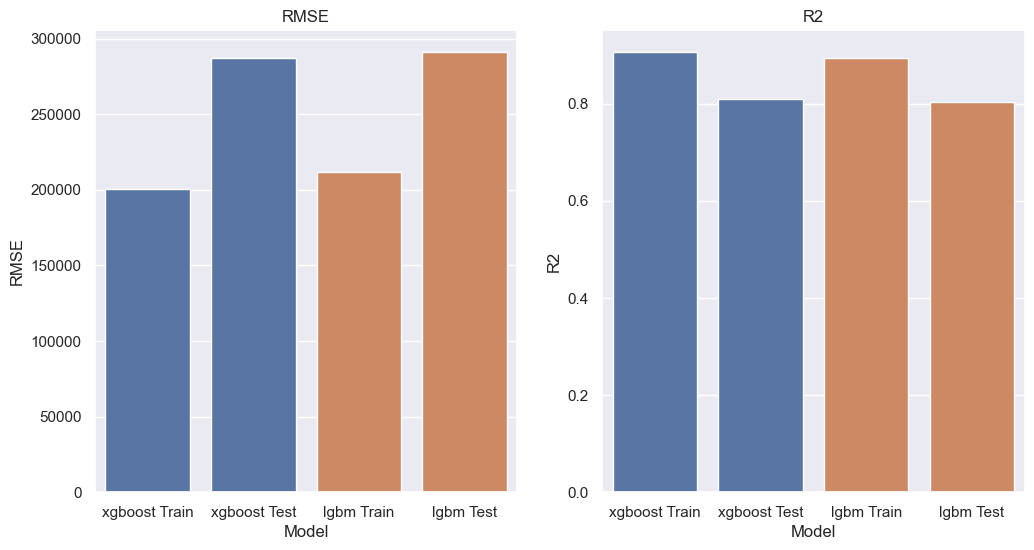

In [61]:
# monitoring the results
plot_reg_results(dict_res)